In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pickle

In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf
start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425997,447610800


In [ ]:
df = df.drop(['Adj Close', 'Date'], axis=1)

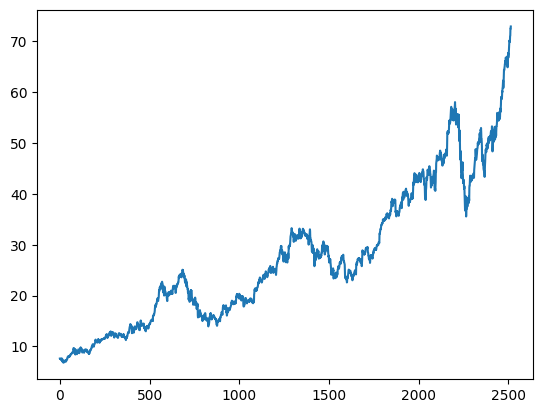

In [ ]:
plt.plot(df.Close)

In [ ]:
weekma = df.Close.rolling(100).mean()

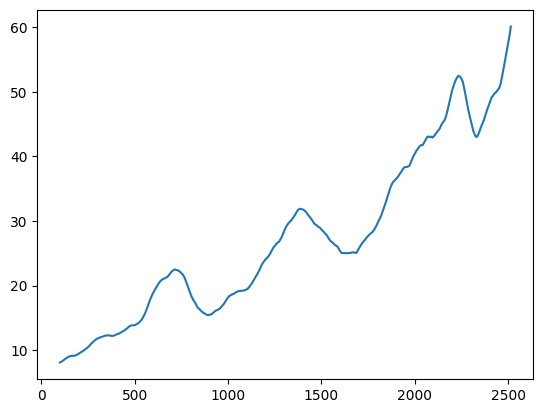

In [ ]:
plt.plot(weekma)

In [ ]:
df.shape

(2515, 6)

In [ ]:
#Splitting into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.tail()

,Close
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997
2514,72.879997


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1660, 100, 1)

In [ ]:
y_train.shape

(1660,)

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
52/52 [==============================] - 25s 312ms/step - loss: 0.0672
Epoch 2/100
52/52 [==============================] - 16s 311ms/step - loss: 0.0151
Epoch 3/100
52/52 [==============================] - 17s 328ms/step - loss: 0.0115
Epoch 4/100
52/52 [==============================] - 16s 313ms/step - loss: 0.0094
Epoch 5/100
52/52 [==============================] - 17s 330ms/step - loss: 0.0090
Epoch 6/100
52/52 [==============================] - 16s 311ms/step - loss: 0.0094
Epoch 7/100
52/52 [==============================] - 17s 333ms/step - loss: 0.0082
Epoch 8/100
52/52 [==============================] - 16s 310ms/step - loss: 0.0078
Epoch 9/100
52/52 [==============================] - 16s 313ms/step - loss: 0.0084
Epoch 10/100
52/52 [==============================] - 17s 323ms/step - loss: 0.0082
Epoch 11/100
52/52 [==============================] - 17s 327ms/step - loss: 0.0071
Epoch 12/100
52/52 [==============================] - 16s 313ms/step - loss: 0.0073
E

In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)
final_df.head()

<ipython-input-28-84fa7e010960>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
inputs = scaler.transform(final_df)
inputs

array([[0.76668248],
       [0.7708505 ],
       [0.76317748],
       [0.76251438],
       [0.7648826 ],
       [0.7771974 ],
       [0.77625005],
       [0.77473443],
       [0.77340823],
       [0.77606063],
       [0.76800868],
       [0.77122943],
       [0.76346165],
       [0.75910413],
       [0.75313622],
       [0.75199945],
       [0.74423167],
       [0.74517895],
       [0.75114692],
       [0.76061982],
       [0.76033558],
       [0.76658773],
       [0.73968465],
       [0.71704442],
       [0.73892687],
       [0.7627038 ],
       [0.79889028],
       [0.83488733],
       [0.82872993],
       [0.81603628],
       [0.81594153],
       [0.81575211],
       [0.82588811],
       [0.80779483],
       [0.80940521],
       [0.81139451],
       [0.81954121],
       [0.80277421],
       [0.81101566],
       [0.80599496],
       [0.81054198],
       [0.81101566],
       [0.81897286],
       [0.82058323],
       [0.83943436],
       [0.84180258],
       [0.85165434],
       [0.848

In [ ]:
inputs.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, (inputs.shape[0])):
    x_test.append(inputs[i-100: i])
    y_test.append(inputs[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
y_predicted = (model.predict(x_test))


24/24 [==============================] - 4s 87ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
scaler.scale_

array([0.0378916])

In [ ]:
scale = 1/0.0378916
scale

26.391073483305007

In [ ]:
y_predicted = scale * y_predicted
y_test = scale * y_test

In [ ]:
y_test.shape

(755,)

In [ ]:
y_predicted.shape

(755, 1)

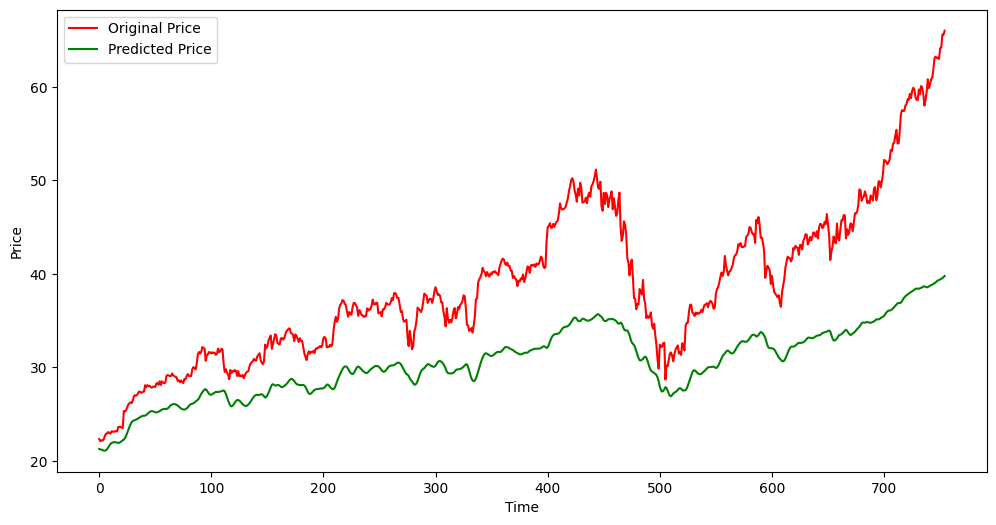

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'r', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#save model
model.save("my_keras_model.h5")